In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
!wget https://raw.githubusercontent.com/Darnivo/MLSem4/main/data.csv

--2024-04-03 17:57:04--  https://raw.githubusercontent.com/Darnivo/MLSem4/main/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 125204 (122K) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>] 122.27K  --.-KB/s    in 0.008s  

2024-04-03 17:57:04 (15.8 MB/s) - ‘data.csv’ saved [125204/125204]



In [ ]:
data = pd.read_csv("data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
encode = preprocessing.LabelEncoder()
data["diagnosis"] = encode.fit_transform(data["diagnosis"])

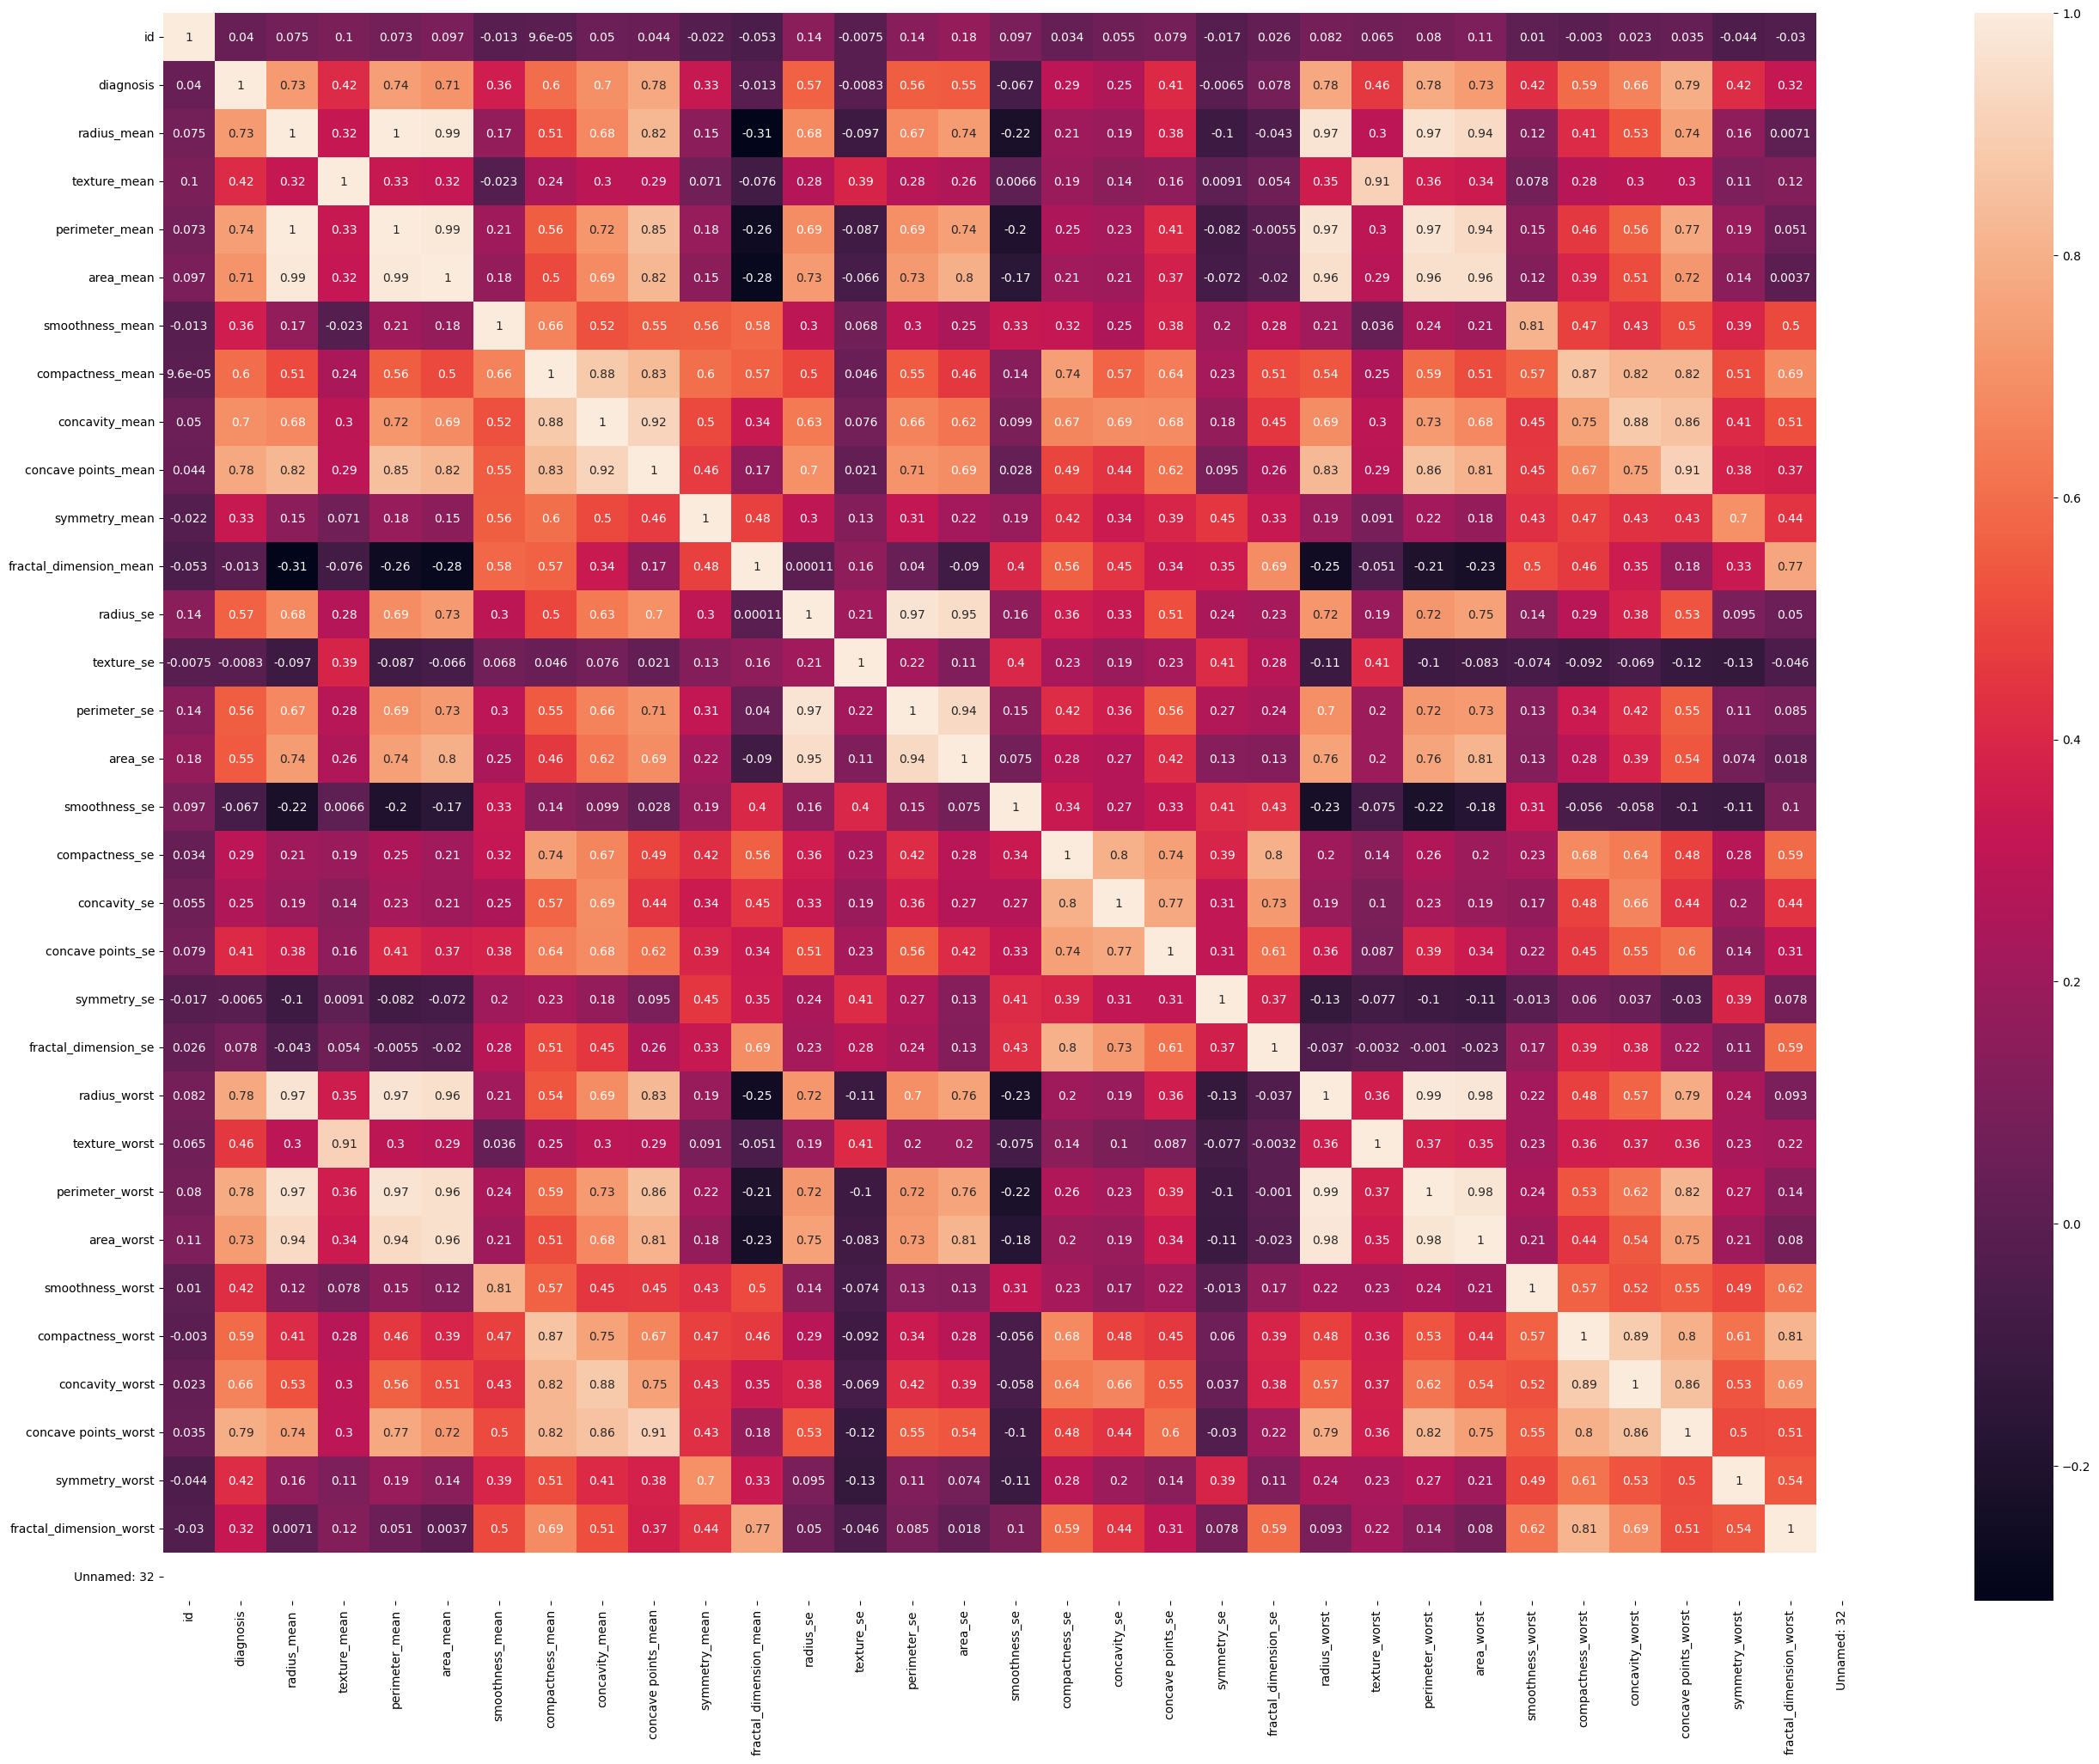

In [ ]:
corr_matrix = data.corr()
sb.heatmap(data = corr_matrix, annot = True)
plt.rcParams["figure.figsize"] = [32,24]
plt.show()


In [ ]:
X = data[["radius_worst","perimeter_mean", "perimeter_worst", "concave points_mean", "concave points_worst"]]
# rw 0.78 pw 0.78 cpm 0.78 cpw 0.78
# rm 0.73 pm 0.74 am 0.71 aw 0.73
Y = data["diagnosis"]

XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.2, random_state = 100)

Train set acc:  0.9296703296703297
Test set acc:  0.956140350877193


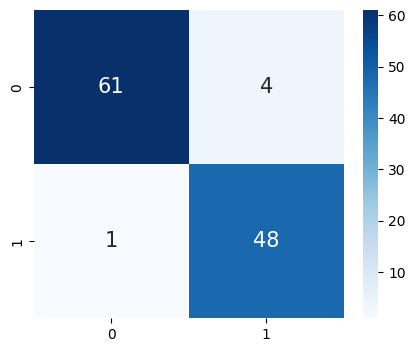

In [ ]:
LGR = LogisticRegression().fit(XTrain, YTrain)
CTest  = LGR.predict(XTest)
CTrain  = LGR.predict(XTrain)
print("Train set acc: ", metrics.accuracy_score(YTrain, CTrain))
print("Test set acc: ", metrics.accuracy_score(YTest, CTest))
cf_matrix = metrics.confusion_matrix(YTest, CTest)
sb.heatmap(cf_matrix, cmap="Blues", annot=True,annot_kws={"size": 15})
plt.rcParams["figure.figsize"] = [5,4]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Train set acc:  0.9538461538461539
Test set acc:  0.9736842105263158
{'C': 250, 'penalty': 'l2', 'solver': 'lbfgs'}


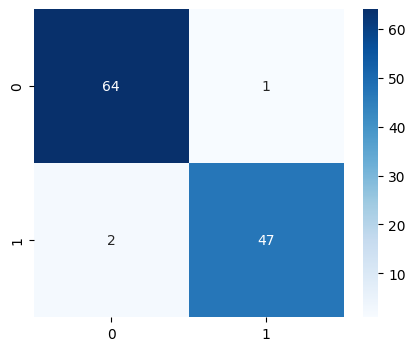

In [ ]:
parameters = {'penalty': ['l2'], 'C': [0.1,1,10,100,200,250,300], 'solver': ['lbfgs']}
LGR = LogisticRegression()
model = GridSearchCV(LGR, parameters).fit(XTrain, YTrain)

COTest = model.predict(XTest)
COTrain = model.predict(XTrain)

print("Train set acc: ", metrics.accuracy_score(YTrain, COTrain))
print("Test set acc: ", metrics.accuracy_score(YTest, COTest))
print(model.best_params_)

cf_matrix = metrics.confusion_matrix(YTest, COTest)
sb.heatmap(cf_matrix, cmap="Blues", annot=True)
plt.rcParams["figure.figsize"] = [5,4]
plt.show()